# IMPORTING

In [764]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv

In [765]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore") 

In [766]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# ANALYSING DATASET #

In [767]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Briefing:
1. **PassengerID** : unique id for each row
2. **Survived** : shows whether passenger survived or not. 1   stands for survived
3. **Pclass** : Ticket Class for each passenger
4. **Name** : Name + title (Mr, Mrs, Miss, Master etc)
5. **Sex** : Male/Female
6. **Age** : Fractional if less than 1. Some ages are unknown and hence left NaN
7. **Parch** : Number of parents per child
8. **SibSp**: Number of siblings or spouses
9. **Ticket** : Ticket number
10. **Fare**: Ticket price
11. **Cabin**: Cabin number and probable location on ship. NaN values are unknown
12. **Embarked**: Port where passenger boarded.

In [768]:
train.shape

(891, 12)

In [769]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [770]:
# describe(include = ['O'])* will show the descriptive statistics of object data types.
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


There are duplicate tickets and cabins.
There are 577 males out of 891 passengers and the remaining are females.
644 passengers boarded from port S

In [771]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, cabin, and embarked have some missing values


In [772]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Finding Relationships ##

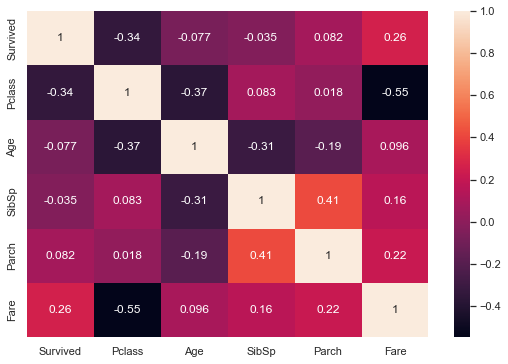

In [773]:
plt.figure(figsize=(9,6))
sns.heatmap(train.drop('PassengerId',axis= 1).corr(), annot=True)
plt.show()

Shows corelation between different features  
*Positive* - Positive corelation, increase in one means increase in other  
*Negative* - Negative corelation, increase in one means decrease in other  
  
Checking *Survival* feature, we see a  

    1. strong negative relation with Pclass  
    2. slight negative relation with age, siblings  
    3. positvie relation when having parents  
  
fare and pclass have implied positive relation (1st class costs more)  
  
This only shows relationship between numerical data. To see relation with sex etc, we will have to convert  male/female to numerical representations


**1. Pclass vs Survival**

In [774]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [775]:
pclass_survived = train.groupby('Pclass').Survived.value_counts()
pclass_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

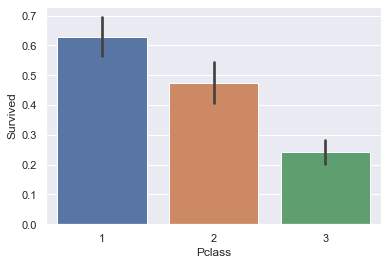

In [776]:
sns.barplot(x=train['Pclass'], y= train['Survived'])
plt.show()

In [777]:
pclass_survived_average = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
pclass_survived_average

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


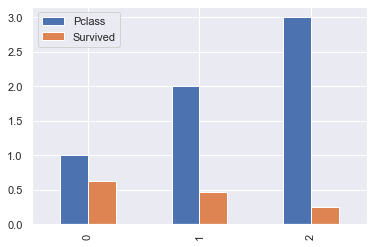

In [778]:
pclass_survived_average.plot(kind='bar')
plt.show()

From the above graphs:  
    First class passengers have a higher chance of survival  
    Third class passengers have the lowest chance of survival despite highest number of passengers  



**2. Sex vs Survival**

In [779]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

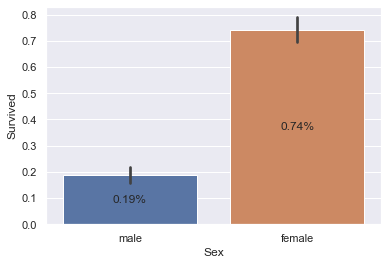

In [780]:
fig = sns.barplot(x=train['Sex'],y=train['Survived'])
plt.bar_label(fig.containers[0],label_type='center',fmt= '%.2f%%')
plt.show()

Females have a much higher chance of survival

**Sex and Pclass vs Survival**

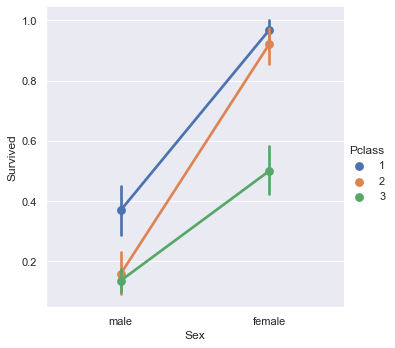

In [781]:
sns.factorplot('Sex', 'Survived', hue='Pclass', data=train)
plt.show()

Above graph shows:  
    Females from 1st and 2nd class have a near 100% chance of survival.  
    Males from 2nd and 3rd class have only a 10% chance of survival.  

**3. Embarked vs Survival**

In [782]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [783]:
embarked_survived_average= train[['Embarked', 'Survived']].groupby(['Embarked'], as_index= False).mean()
embarked_survived_average

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


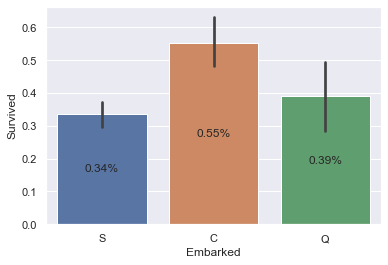

In [784]:
fig= sns.barplot(x='Embarked', y='Survived', data=train)
plt.bar_label(fig.containers[0],label_type= 'center',fmt='%.2f%%')
plt.show()

There are more survivers who embarked from port 'C'


**4. Family Members vs Survival** (SibSp and Parch)

In [785]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [786]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index =False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


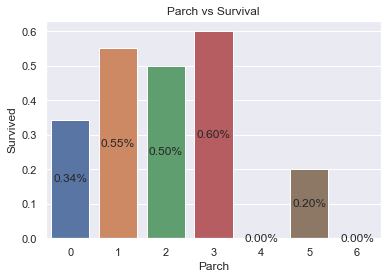

In [787]:
fig =sns.barplot(x= 'Parch', y= 'Survived', ci=None, data= train) #ci=None hides error lines
plt.bar_label(fig.containers[0],label_type='center',fmt='%.2f%%')
plt.title('Parch vs Survival')
plt.show()


Passengers with atleast 1 parent/ guardian were more probable to survive  

In [788]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [789]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


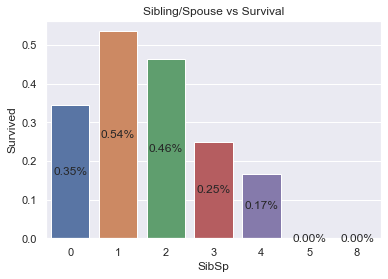

In [790]:
fig = sns.barplot(x='SibSp',y='Survived',ci=None, data= train)
plt.bar_label(fig.containers[0],label_type='center',fmt='%.2f%%')
plt.title('Sibling/Spouse vs Survival')
plt.show()

Passengers with atleast 1 Sibling/Spouse were more probable to survive, but larger families had a lower survival rate.

**5. Age vs Survival**

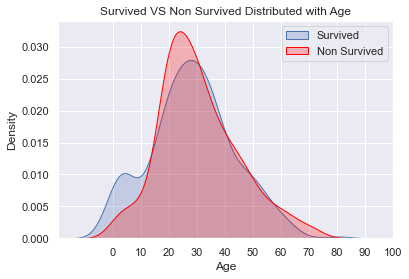

In [791]:
sns.kdeplot(train.loc[(train['Survived']==1),'Age'], fill= 'True',label= 'Survived')
sns.kdeplot(train.loc[(train['Survived']==0),'Age'], color='red', fill=True, label='Non Survived')
plt.legend()
plt.title('Survived VS Non Survived Distributed with Age')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.show()

The above graph indicates that children around the age of 0-5 have a higher survival rate.

**INDICATIONS FROM ABOVE GRAPHS**
* Majority of survivors are children and females.  
* Most of the survivors are from first and second class  
* There is a higher chance of survival when having family members on board  
* Majority of survivors embarked from port C



## FEATURE ENGINEERING/SELECTION ##

In [792]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [793]:
#combining train and test dataset
train_test_data = [train,test]


**1. Name Feature**  
Extracting titles from name column

In [794]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.')

In [795]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [796]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Replacing less frequent titles as "Other"

In [797]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
     
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


Converting Titles into numerical values

In [798]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [799]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


**2. Sex Feature**   
Converting object in sex to numerical value  
Male is assigned 0 and female is assigned 1

In [800]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int, errors='ignore')


In [801]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


**3. Embarked Feature**

In [802]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

As 'S' has the most passengers, we will assume NaN values as 'S'

In [803]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [804]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


Now map values of 'Embarked' to numerical values:  
We represent S as 0, C as 1, Q as 2

In [805]:
for dataset in train_test_data:
    #print(dataset.Embarked.unique())
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [806]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1


**4. Age Feature**

In [807]:
print(train['Age'].isnull().sum())
print(test['Age'].isnull().sum())

177
86


There are many missing age values.  
The missing values are filled with means according to their respective titles.
Average age of all titles is found and inserted in missing values  

In [808]:
title_age_avg= train[['Title', 'Age']].groupby(['Title'],as_index=False).mean().round(decimals=0)
title_age_avg

,Title,Age
0,1,32.0
1,2,22.0
2,3,36.0
3,4,5.0
4,5,46.0


In [809]:
for dataset in train_test_data:
    dataset['Age'] = dataset['Age'].fillna(dataset.groupby('Title')['Age'].transform('mean'))
    dataset['Age'] = dataset['Age'].round(0)

In [810]:
#checking on passenger id 20 which previously had a missing age value
train.loc[(train['PassengerId']==20)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
19,20,1,3,"Masselmani, Mrs. Fatima",1,36.0,0,0,2649,7.225,NaN,1,3


For generalisation, we can classify all ages into age ranges:  
* 0-16 = Age band 0  
* 16-32 = Age band 1   
* 32-48 = Age band 2  
* 48-64 = Age band 3  
* 64+ = Age band 4  

In [811]:
#mapping age to age band for simplification
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [812]:
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

**5. SibSp and Parch Feature**  
SibSp and Parch are combined to a feature "Family Size"

In [813]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


From earlier graphs, travelling with family members had a higher chance of survival.  

For simplification, we will add a new feature "IsAlone" to indicate if passenger is travelling alone or with a family member.

In [814]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [815]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,2,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,1,1


In [816]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,7.0000,NaN,0,3,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,NaN,2,1,1,1
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,8.6625,NaN,0,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0,3,3,0


## Feature Selection ##

Dropping unnecessary columns

In [817]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'FamilySize']
train = train.drop(features_drop, axis= 1)
train = train.drop(['PassengerId'], axis= 1)
test = test.drop(features_drop, axis= 1)

In [818]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,Title,IsAlone
0,0,3,0,1,0,1,0
1,1,1,1,2,1,3,0
2,1,3,1,1,0,2,1
3,1,1,1,2,0,3,0
4,0,3,0,2,0,1,1


In [819]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,IsAlone
0,892,3,0,2,2,1,1
1,893,3,1,2,0,3,0
2,894,2,0,3,2,1,1
3,895,3,0,1,0,1,1
4,896,3,1,1,0,3,0


## PREDICTION ##

Define training and testing set

In [823]:
X_train = train.drop('Survived', axis= 1)
y_train = train['Survived']

X_test = test.drop('PassengerId', axis= 1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [824]:
#importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [825]:
#LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_log_reg) + '%')

Train Accuracy: 80.58%


In [826]:
#Support Vector Machine
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_svc) + '%')

Train Accuracy: 82.72%


In [827]:
#Linear SVM
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_linear_svc) + '%')

Train Accuracy: 79.57%


In [828]:
#k-Nearest Neighbour
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_knn) + '%')

Train Accuracy: 83.05%


In [829]:
#Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_decision_tree) + '%')

Train Accuracy: 84.4%


In [830]:
#Random Forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_random_forest) + '%')

Train Accuracy: 84.4%


In [831]:
#Gaussian Naive Bayes
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_gnb) + '%')

Train Accuracy: 78.11%


In [832]:
#Perceptron
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_perceptron) + '%')


Train Accuracy: 78.11%


In [833]:
#Stochastic Gradient Descent
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_sgd) + '%')

Train Accuracy: 70.03%


## Comparing Models ##

In [836]:
models = pd.DataFrame({
    'Model': ['LR', 'SVM', 'L-SVC', 
              'KNN', 'DTree', 'RF', 'NB', 
              'Perceptron', 'SGD'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models = models.sort_values(by='Score', ascending=False)
models

,Model,Score
4,DTree,84.40
5,RF,84.40
3,KNN,83.05
1,SVM,82.72
0,LR,80.58
2,L-SVC,79.57
6,NB,78.11
7,Perceptron,78.11
8,SGD,70.03


## Submission ##

In [837]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked,Title,IsAlone
0,892,3,0,2,2,1,1
1,893,3,1,2,0,3,0
2,894,2,0,3,2,1,1
3,895,3,0,1,0,1,1
4,896,3,1,1,0,3,0


In [839]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_random_forest
    })

submission.to_csv('gender_submission.csv', index=False)